# Ожидаемая продолжительность жизни

<font size = 4> **Описание проекта**
    
Идея проекта была взята с сайта **Kaggle**.
    
Исследование ожидаемой продолжительности жизни в странах уже давно в центре внимания специалистов в области машинного обучения. Тщательный анализ данных и алгоритмы прогнозирования используются для выявления причин, вызывающих различия в продолжительности жизни между странами. С помощью мощных статистических инструментов можно получить ценную информацию о сложной связи между здравоохранением, социально-экономическими факторами и ожидаемой продолжительностью жизни. Данный проект направлен на разгадывание загадок, стоящих за долголетием человека. 
    
**Ожидаемая продолжительность жизни** — значение средней продолжительности предстоящей жизни, прогнозируемое в предположении, что уровни смертности населения во всех возрастах в будущем останутся такими же, как в рассматриваемом году. 
В данном проекте, под ожидаемой продолжительностью жизни понимаем ожидаемую продолжительность жизни при рождении, то есть в возрасте 0 лет.   
    
В двух словах, это исследование будет сосредоточено на факторах иммунизации и смертности, на экономических и социальных данных, а также на других показателях связанных со здоровьем.

Поскольку наблюдения основаны на данных по разным странам, исследователям будет легче определить прогнозирующий фактор, который способствует снижению ожидаемой продолжительности жизни. Это поможет им определить, какой области следует уделить особое внимание в стране, чтобы эффективно повысить ожидаемую продолжительность жизни ее населения.
       
В работе будем исследовать статистики стран за год (с 2000 по 2020 гг.).  
    
Данные взяты из открытых источников:  
* https://data.worldbank.org - База данных Всемирного банка
* https://data.who.int - Всемирная организация здравоохранения (ВОЗ)

<font size = 4> **Цель проекта**   
    
Нам нужно изучить данные по странам и найти интересные закономерности в областях здоровья и экономики.   
После этого построить модель машинного обучения предсказывающую ожидаемую продолжительность жизни человека (задача регрессии).   
Метрика качества работы модели: `MAE`(средняя абсолютная ошибка). 

<font size = 4> **План проекта**

**1.  Изучение данных**  
  
1.1  Установим необходимые библиотеки.   
1.2  Выполним импорт библиотек, модулей, моделей машинного обучения, способов работы с выборками, различных метрик.    
1.3  Загрузим данные из xls-файлов в датафреймы и сохраним в переменные.     
1.4  Загрузим данные из csv-файлов в датафреймы и сохраним в переменные.   
1.5  Объединим данные в одну таблицу.   
1.6  Добавим в таблицу информацию о странах.   
1.7  Выведим основную информацию о датафрейме.   

    
**2.  Предобработка данных**  
    
2.1  Проверим данные на наличие дубликатов.  
2.2  Обработаем пропуски в данных.  
2.3  Преобразуем форматы данных.  
    
    
**3.  Поиск зависимостей в данных**  
    
3.1  Рассчитаем корреляцию в данных.  
3.2  Изучим распределение целевого признака.  
3.3  Изучим зависимости целевого признака от числовых признаков.   
    
    
**4.  Обучение моделей**  
    
4.1  Разобьем данные на выборки.  
4.2  Выполним кодирование и масштабирование признаков.  
4.3  Обучим модели на тренировочной выборке.  
4.4  Сравним результаты работы моделей.  
    
    
**5.  Анализ лучшей модели**  
    
5.1  Проверим качество итоговой модели на тестовой выборке.  
5.2  Проверим модель на адекватность предсказаний.  
5.3  Оценим важность признаков для работы модели.  
    
    
**6.  Общий вывод**  

## Изучение данных

### Установим библиотеки.

In [1]:
pip install phik

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install optuna

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install countryinfo

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


### Выполним импорт библиотек, модулей, моделей машинного обучения, способов работы с выборками, различных метрик.

In [7]:
# Импорт стандартных библиотек и модулей и функций
import warnings
import time
from itertools import chain

# Импорт сторонних библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import optuna
import phik
import shap
shap.initjs()

# Отключение предупреждений
pd.options.mode.chained_assignment = None
warnings.filterwarnings('ignore')

# Увеличение лимита отображаемых столбцов для того, чтобы было видно всю таблицу
pd.set_option('display.max_columns', None)

In [8]:
# Импорт моделей машинного обучения
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import (LinearRegression,
                                  Lasso,
                                  Ridge,
                                  ElasticNet)
from sklearn.ensemble import (RandomForestRegressor,
                              GradientBoostingRegressor)
from lightgbm import LGBMRegressor

# Импорт метрик
from sklearn.metrics import (mean_squared_error,
                             mean_absolute_error,
                             r2_score)

# Импорт способов создания цепочек автоматических действий (выполняются одна за другой)
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Импорт способов работы с выборками
from sklearn.utils import shuffle
from sklearn.preprocessing import (StandardScaler,
                                   OneHotEncoder)
from sklearn.model_selection import (train_test_split,
                                     cross_val_score,
                                     learning_curve)

# Модуль python для возврата данных о странах, информации ISO и штатах / провинциях внутри них
from countryinfo import CountryInfo

# Импорт библиотек для запуска циклов с "прогрессбар"
from tqdm.autonotebook import tqdm, trange
from time import sleep

# Объявление константы для воспроизводимости псевдослучайных значений 
RANDOM_STATE = 300

### Загрузим данные из xls-файлов в датафреймы и сохраним в переменные.
Данные файлы мы скачали с сайта `data.worldbank.org`.  
После загрузки таблиц, преобразуем их в формат вида: `страна` - `год` - `статистика`.   
Для удобства преобразования напишем специальную  функцию.

In [9]:
# Загрузка данных ожидаемой продолжительности жизни 
life_expectancy = pd.read_excel('d:/Data_science/Projects_jupiter/data/kaggle/Life_expectancy/'
                                'Life expectancy at birth.xls',
                                sheet_name = 'Data')

# Загрузка данных численности населения
population = pd.read_excel('d:/Data_science/Projects_jupiter/data/kaggle/Life_expectancy/'
                           'Population.xls',
                           sheet_name = 'Data')

# Загрузка данных ВВП на душу населения
gpd_per_capita = pd.read_excel('d:/Data_science/Projects_jupiter/data/kaggle/Life_expectancy/'
                               'GDP per capita.xls',
                               sheet_name = 'Data')

# Загрузка данных расходов на здравоохранение 
health_expenditure = pd.read_excel('d:/Data_science/Projects_jupiter/data/kaggle/Life_expectancy/'
                                   'Current health expenditure (% of GDP).xls',
                                   sheet_name = 'Data')

# Загрузка данных длительности обязательного образования
education_duration = pd.read_excel('d:/Data_science/Projects_jupiter/data/kaggle/Life_expectancy/'
                                   'Compulsory education duration (years).xls',
                                   sheet_name = 'Data')

# Загрузка данных заболеваемости ВИЧ
hiv_incidence = pd.read_excel('d:/Data_science/Projects_jupiter/data/kaggle/Life_expectancy/'
                              'Incidence of HIV ages 15-49.xls',
                              sheet_name = 'Data')

# Загрузка данных смертности взрослых мужчин
mortality_adult_male = pd.read_excel('d:/Data_science/Projects_jupiter/data/kaggle/Life_expectancy/'
                                     'Mortality rate adult male.xls',
                                     sheet_name = 'Data')

# Загрузка данных смертности в результате ДТП
road_deaths = pd.read_excel('d:/Data_science/Projects_jupiter/data/kaggle/Life_expectancy/'
                            'Mortality by road traffic injury.xls',
                            sheet_name = 'Data')

In [10]:
# Вывод случайных строк непреобразованной таблицы
road_deaths.sample(2)

,Country Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
131,Liberia,35.5,35.4,34.8,37.5,37.3,36.5,34.7,33.6,33.9,33.4,33.1,32.9,34.0,34.1,34.8,35.2,36.1,37.0,37.9,38.9
263,South Africa,44.0,38.3,39.9,43.4,41.3,38.1,41.1,32.4,29.5,28.6,28.6,27.8,26.5,22.8,24.0,24.1,25.8,23.2,22.7,22.2


In [11]:
# Функция преобразования таблицы в удобный формат
def table_xls(data, value_name):
    '''
    data - исходная таблица
    value_name - название числового признака в итоговой таблице
    '''
    # Переименование колонки таблицы
    data = data.rename(columns={'Country Name': 'country'})
    # Создание пустой итоговой таблицы
    data_all = pd.DataFrame(columns=('country', value_name, 'year'))
    # Цикл создание таблиц с данными для каждого года по всем странам
    for col in data.columns[1:]:
        data_new = data[['country', col]]
        # Добавление в таблицу значения года 
        data_new['year'] = float(col)
        # Переименование названия колонки исходной статистики
        data_new = data_new.rename(columns={col: value_name})
        # Добавление таблицы в итоговую
        data_all = pd.concat([data_all, data_new])  
    # Смена порядка столбцов в таблице
    data_all = data_all[['country', 'year', value_name]]
    data_all[value_name] = round(data_all[value_name], 2)
    return data_all

In [12]:
# Преобразование таблиц в удобный формат с помощью функции
life_expectancy = table_xls(life_expectancy, 'life_expect')
population = table_xls(population, 'population')
gpd_per_capita = table_xls(gpd_per_capita, 'gdp')
health_expenditure = table_xls(health_expenditure, 'health_expend')
education_duration = table_xls(education_duration, 'edu_dur')
hiv_incidence = table_xls(hiv_incidence, 'hiv')
mortality_adult_male = table_xls(mortality_adult_male, 'mort_ad_male')
road_deaths = table_xls(road_deaths, 'road_deaths')

In [13]:
# Вывод случайных строк преобразованной таблицы
road_deaths.sample(2)

,country,year,road_deaths
33,Botswana,2006.0,24.7
69,Eritrea,2007.0,33.8


### Загрузим данные из csv-файлов в датафреймы и сохраним в переменные.
Данные файлы мы скачали с сайта `data.who.int`.  
После загрузки таблиц, сразу сразу выберем из них данные: `страна` - `год` - `статистика`.   
После этого преобразуем таблицы в удобный формат. Избавимся от интервальных значений показателей, оставив только средние значения.   
Для удобства преобразования напишем специальную  функцию.  

In [14]:
# Загрузка данных потребления алкоголя
alcohol = pd.read_csv('d:/Data_science/Projects_jupiter/data/kaggle/Life_expectancy/'
                      'Alcohol.csv')
# Выбор необходимых колонок из загруженной таблицы
alcohol = alcohol[['Location', 'Period', 'Value']]

# Загрузка данных среднего индекса массы тела человека
body_mass_index = pd.read_csv('d:/Data_science/Projects_jupiter/data/kaggle/Life_expectancy/'
                              'Mean body mass index.csv')
# Выбор необходимых колонок из загруженной таблицы
body_mass_index = body_mass_index[['Location', 'Period', 'Value']]
# Удаление пропущенных данных
body_mass_index = body_mass_index[body_mass_index['Value'] != 'No data']

# Загрузка данных смертности детей в возрасте от 5 до 14 лет
mortality_5_14 = pd.read_csv('d:/Data_science/Projects_jupiter/data/kaggle/Life_expectancy/'
                             'Mortality rate for 5-14 year-olds.csv')
# Выбор данных для обоих полов
mortality_5_14 = mortality_5_14[mortality_5_14['Dim1'] == 'Both sexes']
# Выбор необходимых колонок из загруженной таблицы
mortality_5_14 = mortality_5_14[['Location', 'Period', 'Value']]

# Загрузка данных смертности детей в возрасте до 5 лет
mortality_under_5 = pd.read_csv('d:/Data_science/Projects_jupiter/data/kaggle/Life_expectancy/'
                                'Under-five mortality rate.csv')
# Выбор данных для обоих полов
mortality_under_5 = mortality_under_5[mortality_under_5['Dim1'] == 'Both sexes']
# Выбор необходимых колонок из загруженной таблицы и переименование колонки "First Tooltip"
mortality_under_5 = mortality_under_5[['Location', 'Period', 'First Tooltip']].rename(columns={'First Tooltip': 'Value'})

# Загрузка данных младенческой смертности
mortality_infant = pd.read_csv('d:/Data_science/Projects_jupiter/data/kaggle/Life_expectancy/'
                               'Infant mortality rate.csv')
# Выбор данных для обоих полов
mortality_infant = mortality_infant[mortality_infant['Dim1'] == 'Both sexes']
# Выбор необходимых колонок из загруженной таблицы
mortality_infant = mortality_infant[['Location', 'Period', 'Value']]

# Загрузка данных иммунизации против дифтерии
diphtheria_coverage = pd.read_csv('d:/Data_science/Projects_jupiter/data/kaggle/Life_expectancy/'
                                  'Diphtheria immunization coverage.csv')
# Выбор необходимых колонок из загруженной таблицы
diphtheria_coverage = diphtheria_coverage[['Location', 'Period', 'Value']]

# Загрузка данных иммунизации против гепатита B
hepatitis_b_coverage = pd.read_csv('d:/Data_science/Projects_jupiter/data/kaggle/Life_expectancy/'
                                   'Hepatitis B immunization coverage.csv')
# Выбор необходимых колонок из загруженной таблицы
hepatitis_b_coverage = hepatitis_b_coverage[['Location', 'Period', 'Value']]

# Загрузка данных иммунизации против кори
measles_coverage = pd.read_csv('d:/Data_science/Projects_jupiter/data/kaggle/Life_expectancy/'
                               'Measles immunization coverage.csv')
# Выбор необходимых колонок из загруженной таблицы
measles_coverage = measles_coverage[['Location', 'Period', 'Value']]

# Загрузка данных иммунизации против полиомиелита
polio_coverage = pd.read_csv('d:/Data_science/Projects_jupiter/data/kaggle/Life_expectancy/'
                             'Polio immunization coverage.csv')
# Выбор необходимых колонок из загруженной таблицы
polio_coverage = polio_coverage[['Location', 'Period', 'Value']]

In [15]:
# Вывод случайных строк непреобразованной таблицы
body_mass_index.sample(2)

,Location,Period,Value
1550,Tuvalu,2009,30.3 [28.8 – 31.9]
1694,Norway,2008,26.3 [25.7 – 26.8]


In [16]:
# Функция преобразования таблицы в удобный формат
def table_csv(data, value_name):
    '''
    data - исходная таблица
    value_name - название числового признака в итоговой таблице
    '''
    # Переименование колонки таблицы
    data = data.rename(columns={'Location': 'country',
                                'Period': 'year',
                                'Value': value_name})
    # Удаление интервальных значений показателей находившихся в нутри квадратных скобок
    data[value_name] = (round(data[value_name].astype(str)
                                              .str.split(r'[')
                                              .str[0]
                                              .astype(float), 2))
    return data

In [17]:
# Преобразование таблиц в удобный формат с помощью функции
alcohol = table_csv(alcohol, 'alco')
body_mass_index = table_csv(body_mass_index, 'bmi')
mortality_5_14 = table_csv(mortality_5_14, 'mort_5_14')
mortality_under_5 = table_csv(mortality_under_5, 'mort_under_5')
mortality_infant = table_csv(mortality_infant, 'mort_infant')
diphtheria_coverage = table_csv(diphtheria_coverage, 'diphtheria')
hepatitis_b_coverage = table_csv(hepatitis_b_coverage, 'hepatitis_b')
measles_coverage = table_csv(measles_coverage, 'measles')
polio_coverage = table_csv(polio_coverage, 'polio')

In [18]:
# Вывод случайных строк непреобразованной таблицы
body_mass_index.sample(2)

,country,year,bmi
952,Iraq,2012,28.3
2927,Viet Nam,2001,20.0


In [19]:
# Проверка совпадения имён стран
miss = []
for country in mortality_under_5['country'].unique():
    if country not in life_expectancy['country'].unique():
        miss.append(country)
miss

['Bahamas',
 'Anguilla',
 'Bolivia (Plurinational State of)',
 'Congo',
 'Cook Islands',
 'Côte d’Ivoire',
 "Democratic People's Republic of Korea",
 'Democratic Republic of the Congo',
 'Egypt',
 'Gambia',
 'Iran (Islamic Republic of)',
 'Kyrgyzstan',
 "Lao People's Democratic Republic",
 'Micronesia (Federated States of)',
 'Montserrat',
 'Niue',
 'Occupied Palestinian territory',
 'Republic of Korea',
 'Republic of Moldova',
 'The former Yugoslav Republic of Macedonia',
 'Saint Kitts and Nevis',
 'Saint Lucia',
 'Saint Vincent and the Grenadines',
 'Slovakia',
 'Türkiye',
 'United Kingdom of Great Britain and Northern Ireland',
 'United Republic of Tanzania',
 'United States of America',
 'Venezuela (Bolivarian Republic of)',
 'Viet Nam',
 'Yemen']

**Замечание:**  Так как данные скачаны с разных ресурсов, то названия стран могут немного отличаться. Поэтому в дальнейшем на этапе объединения таблиц некоторые страны (из ресурса `data.who.int`) мы переименуем, так чтобы названия совпадали. Таким образом данные будут немного полнее.   
Строки с теми странами, для которых не получится найти ту же страну в данных с ресурса `data.worldbank.org` мы удалим, так как полных данных по этим странам в общей таблице не будет (будут только данные с ресурса `data.who.int` по этим странам, и этого не достаточно для работы с ними).  

### Объединим данные в одну таблицу.
Мы располагаем данными из двух источников: ВОЗ и Всемирного банка.    
При этом из базы данных ВОЗ мы располагаем данными по 200 странам, а из базы данных Всемирногор банка информацией по 266 странам. Данные по 66 странам будут заведомо не полными.   
Поэтому, в общую таблицу будем добавлять сначала данные из ВОЗ (методом `outer`, чтобы в таблицу попали все страны, не смотря на то, что по некоторым из них данные могут отсутствовать).   
Затем будем добавлять данные из Всемирного банка (методом `left`, чтобы добавлялась информация только по странам присутствующим в базе данных ВОЗ, которые мы добавили на предидущем этапе).

In [20]:
# Выбор столбцов по которым будет происходить объединение
left_on=['country', 'year']
right_on=['country', 'year']

# Объединение и добавление данныз из источника ВОЗ 
df = pd.merge(alcohol, body_mass_index,  how='outer', left_on=left_on, right_on=right_on)
df = pd.merge(df, mortality_5_14,  how='outer', left_on=left_on, right_on=right_on)
df = pd.merge(df, mortality_under_5,  how='outer', left_on=left_on, right_on=right_on)
df = pd.merge(df, mortality_infant,  how='outer', left_on=left_on, right_on=right_on)
df = pd.merge(df, diphtheria_coverage,  how='outer', left_on=left_on, right_on=right_on)
df = pd.merge(df, hepatitis_b_coverage,  how='outer', left_on=left_on, right_on=right_on)
df = pd.merge(df, measles_coverage,  how='outer', left_on=left_on, right_on=right_on)
df = pd.merge(df, polio_coverage,  how='outer', left_on=left_on, right_on=right_on)

# Переименование названия стран
df = df.replace('United States of America', 'United States')
df = df.replace('United Kingdom of Great Britain and Northern Ireland', 'United Kingdom')
df = df.replace('Türkiye', 'Turkiye')
df = df.replace('Republic of Korea', 'Korea, Rep.')
df = df.replace('Iran (Islamic Republic of)', 'Iran, Islamic Rep.')

# Добавление данныз из источника Всемирного банка 
df = pd.merge(df, life_expectancy,  how='left', left_on=left_on, right_on=right_on)
df = pd.merge(df, population,  how='left', left_on=left_on, right_on=right_on)
df = pd.merge(df, gpd_per_capita,  how='left', left_on=left_on, right_on=right_on)
df = pd.merge(df, health_expenditure,  how='left', left_on=left_on, right_on=right_on)
df = pd.merge(df, education_duration,  how='left', left_on=left_on, right_on=right_on)
df = pd.merge(df, hiv_incidence,  how='left', left_on=left_on, right_on=right_on)
df = pd.merge(df, mortality_adult_male,  how='left', left_on=left_on, right_on=right_on)
df = pd.merge(df, road_deaths,  how='left', left_on=left_on, right_on=right_on)

# Удаление строк с неполными данными по странам
df = df[~df['country'].isin(miss)]

# Сортировка данных итоговой таблицы
df = df.sort_values(by=['country', 'year']).reset_index(drop=True)
print('Количество стран в таблице:', len(df['country'].unique()))
df

Количество стран в таблице: 174


,country,year,alco,bmi,mort_5_14,mort_under_5,mort_infant,diphtheria,hepatitis_b,measles,polio,life_expect,population,gdp,health_expend,edu_dur,hiv,mort_ad_male,road_deaths
0,Afghanistan,2000,0.00,21.7,9.87,129.30,90.56,24.0,NaN,27.0,24.0,55.30,19542982.0,NaN,NaN,6.0,0.03,355.45,14.7
1,Afghanistan,2001,NaN,21.8,9.60,125.30,88.02,33.0,NaN,37.0,35.0,55.80,19688632.0,NaN,NaN,6.0,0.03,349.36,15.1
2,Afghanistan,2002,NaN,21.9,9.36,121.20,85.41,36.0,NaN,35.0,36.0,56.45,21000256.0,183.53,9.44,6.0,0.04,331.54,14.9
3,Afghanistan,2003,NaN,22.0,9.25,117.00,82.78,41.0,NaN,39.0,41.0,57.34,22645130.0,200.46,8.94,6.0,0.04,321.91,15.0
4,Afghanistan,2004,NaN,22.1,9.28,112.80,80.10,50.0,NaN,48.0,50.0,57.94,23553551.0,221.66,9.81,6.0,0.04,313.48,15.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3645,Zimbabwe,2016,NaN,23.8,12.77,57.87,40.57,90.0,90.0,95.0,90.0,60.31,14452704.0,1421.79,7.47,7.0,5.64,409.21,39.9
3646,Zimbabwe,2017,NaN,NaN,12.42,56.18,39.46,89.0,89.0,90.0,89.0,60.71,14751101.0,1192.11,6.36,7.0,4.82,405.92,40.1
3647,Zimbabwe,2018,NaN,NaN,12.09,53.69,38.02,89.0,89.0,88.0,89.0,61.41,15052184.0,2269.18,4.67,7.0,3.80,391.37,40.6
3648,Zimbabwe,2019,3.63,NaN,11.76,52.67,37.09,90.0,90.0,85.0,90.0,61.29,15354608.0,1421.87,3.66,7.0,3.11,400.48,41.2


### Добавим в таблицу информацию о странах.
В итоговую таблицу с помощью модуля CountryInfo() добавим информацию о принадлежности страны к региону и субрегиону.

In [21]:
# Добавление столбца с регионами к которым принадлежат страны
region = []
for country in tqdm(df['country']):
    try:
        country_info = CountryInfo(country)
        region.append(country_info.region())
    except:
        region.append(None)
sleep(0.00001)
df['region'] = region 

  0%|          | 0/3650 [00:00<?, ?it/s]

In [22]:
# Добавление столбца с субрегионами к которым принадлежат страны
subregion = []
for country in tqdm(df['country']):
    try:
        country_info = CountryInfo(country)
        subregion.append(country_info.subregion())
    except:
        subregion.append(None)
sleep(0.00001)
df['subregion'] = subregion 

  0%|          | 0/3650 [00:00<?, ?it/s]

In [23]:
# Удаление и сохранение перемещаемых столбцов в переменные
column_to_move_1 = df.pop('region')
column_to_move_2 = df.pop('subregion')
column_to_move_3 = df.pop('life_expect')
column_to_move_4 = df.pop('mort_ad_male')
# Вставка столбцов в начало таблицы
df.insert(2, 'region', column_to_move_1)
df.insert(3, 'subregion', column_to_move_2)
df.insert(4, 'life_expect', column_to_move_3)
df.insert(7, 'mort_ad_male', column_to_move_4)
# Вывод 5 первых строк получившейся таблицы на экран
df.head()

,country,year,region,subregion,life_expect,alco,bmi,mort_ad_male,mort_5_14,mort_under_5,mort_infant,diphtheria,hepatitis_b,measles,polio,population,gdp,health_expend,edu_dur,hiv,road_deaths
0,Afghanistan,2000,Asia,Southern Asia,55.30,0.0,21.7,355.45,9.87,129.3,90.56,24.0,NaN,27.0,24.0,19542982.0,NaN,NaN,6.0,0.03,14.7
1,Afghanistan,2001,Asia,Southern Asia,55.80,NaN,21.8,349.36,9.60,125.3,88.02,33.0,NaN,37.0,35.0,19688632.0,NaN,NaN,6.0,0.03,15.1
2,Afghanistan,2002,Asia,Southern Asia,56.45,NaN,21.9,331.54,9.36,121.2,85.41,36.0,NaN,35.0,36.0,21000256.0,183.53,9.44,6.0,0.04,14.9
3,Afghanistan,2003,Asia,Southern Asia,57.34,NaN,22.0,321.91,9.25,117.0,82.78,41.0,NaN,39.0,41.0,22645130.0,200.46,8.94,6.0,0.04,15.0
4,Afghanistan,2004,Asia,Southern Asia,57.94,NaN,22.1,313.48,9.28,112.8,80.10,50.0,NaN,48.0,50.0,23553551.0,221.66,9.81,6.0,0.04,15.2


**Описание данных**
 
`country` — исследуемая страна    
`year` — календарный год (в диапазоне с 2000 по 2020)  
`region`— регион страны  
`subregion` — субрегион страны  
`life_expect` — ожидаемая продолжительность жизни людей в годах  
`alco` — уровень потребления алкоголя в стране (измеряется в литрах чистого алкоголя на душу населения старше 15 лет)    
`bmi` — cредний индекс массы тела населения страны   
`mort_ad_male` — коэффициент смертности взрослого мужского населения (вероятность смерти в возрасте от 15 до 60 лет на 1000 человек населения)   
`mort_5_14` — коэффициент смертности подросткового населения (вероятность смерти в возрасте от 5 до 14 лет на 1000 человек населения)   
`mort_under_5` — коэффициент смертности детей (вероятность смерти в возрасте до 5 лет на 1000 человек населения)     
`mort_infant` — коэффициент младенческой смертности (в возрасте от рождения до 11 месяцев на 1000 живорождений)      
`diphtheria` — охват иммунизацией против дифтерии, столбнячного анатоксина и коклюша среди детей в возрасте до 1 года (в %)  
`hepatitis_b` — охват иммунизацией против гепатита В среди детей в возрасте до 1 года (в %)   
`measles` — охват иммунизацией против кори среди детей в возрасте до 1 года (в %)   
`polio` — охват иммунизацией против полиомиелита среди детей в возрасте до 1 года (в %)   
`population` — численность населения страны   
`gdp` — валовой внутренний продукт (ВВП) на душу населения (в долларах США)   
`health_expend` — расходы на здравоохранение в процентах от валового внутреннего продукта (ВВП)  
`edu_dur` — продолжительность обязательного образования в годах  
`hiv` — заболеваемость ВИЧ в возрасте 15-49 лет на 1000 человек населения   
`road_deaths` — смертность в результате ДТП на 100 000 человек населения   

### Выведим основную информацию о датафрейме. 

In [24]:
# Получение общей информации о данных в таблице df
df.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        3650 non-null   object 
 1   year           3650 non-null   int64  
 2   region         3360 non-null   object 
 3   subregion      3358 non-null   object 
 4   life_expect    3551 non-null   float64
 5   alco           826 non-null    float64
 6   bmi            2856 non-null   float64
 7   mort_ad_male   3523 non-null   float64
 8   mort_5_14      3633 non-null   float64
 9   mort_under_5   3633 non-null   float64
 10  mort_infant    3633 non-null   float64
 11  diphtheria     3572 non-null   float64
 12  hepatitis_b    3027 non-null   float64
 13  measles        3572 non-null   float64
 14  polio          3570 non-null   float64
 15  population     3633 non-null   float64
 16  gdp            3563 non-null   float64
 17  health_expend  3503 non-null   float64
 18  edu_dur 

**Замечание:**  Итак, в таблице 21 столбец, с разными типами данных `object`, `int64`, `float64`.  
Количество значений в столбцах различается. Значит, в данных есть пропущенные значения.   

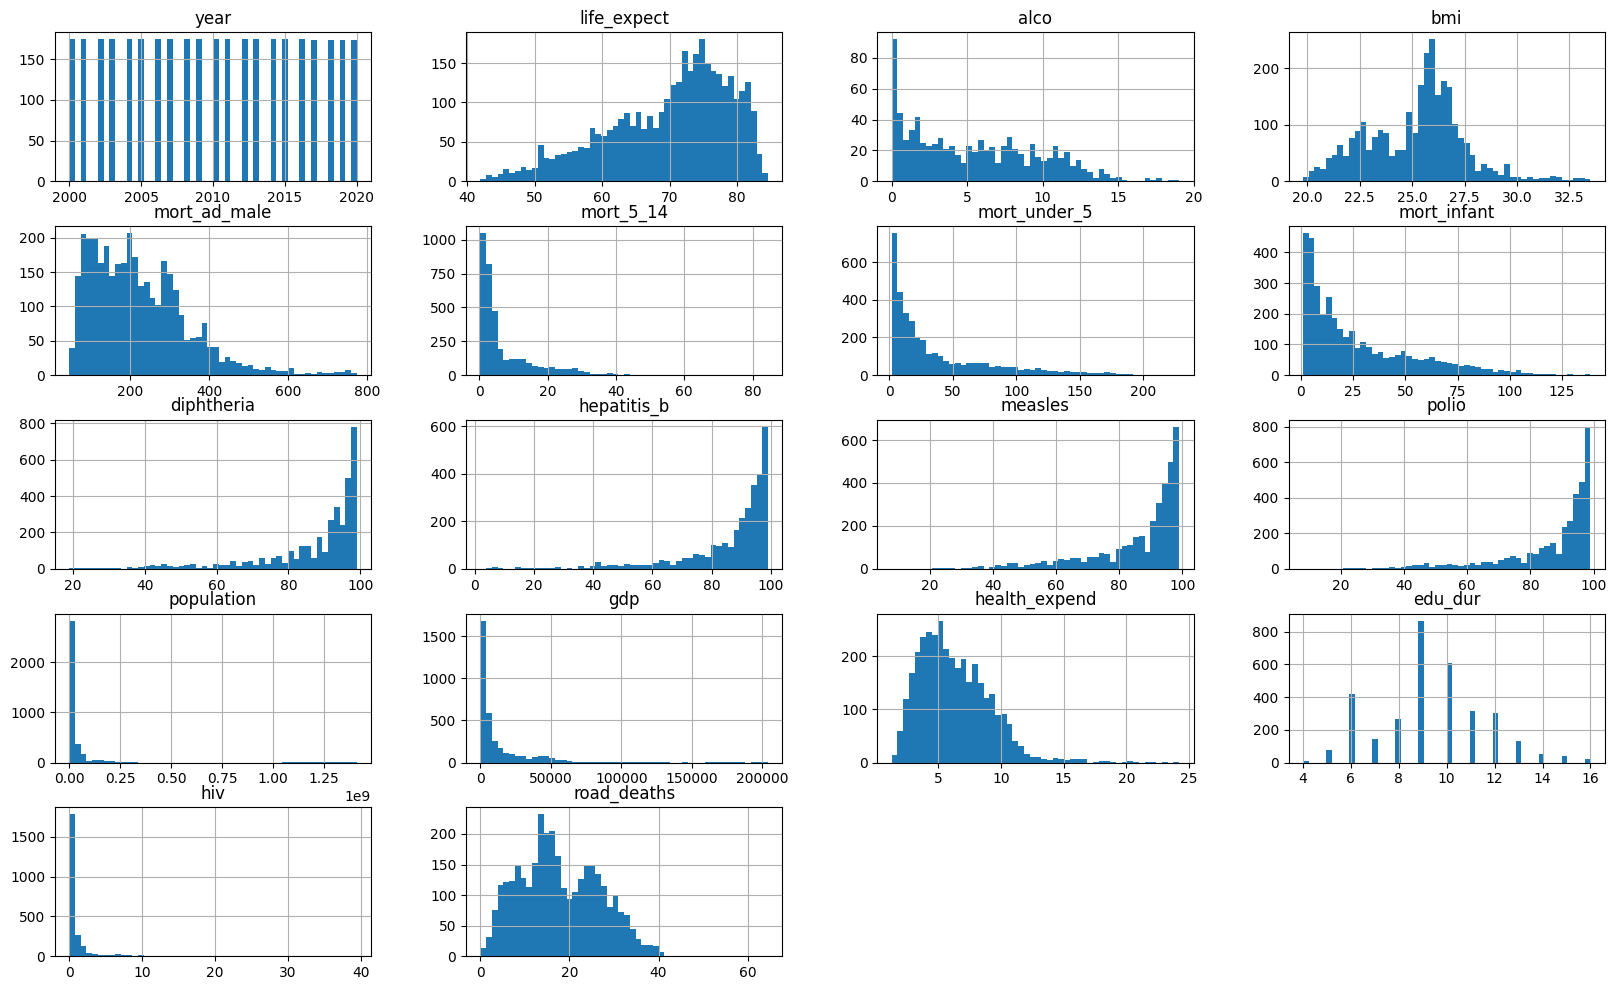

In [25]:
# Визуализация распределения значений числовых признаков с помощью построения гистограмм
df.hist(figsize=(20,12), bins=50);   

**Замечание:**  Распределение данных выглядит адекватно. Аномальных значений не наблюдается. 

## Предобработка данных

Для адекватных предсказаний модели машинного обучения, нам нужно очистить данные от значений, которые не соответствуют действительности. Также можно попробовать заполнить пропущенные значения, там где это возможно.

### Проверим данные на наличие дубликатов.

In [26]:
print('Количество объектов с одинаковыми значениями:', df.duplicated().sum())

Количество объектов с одинаковыми значениями: 0


**Замечание:**  Дубликатов не обнаружено.

### Обработаем пропуски в данных.

In [27]:
# Рассчёт количества пропущенных значений
df.isna().sum()

country             0
year                0
region            290
subregion         292
life_expect        99
alco             2824
bmi               794
mort_ad_male      127
mort_5_14          17
mort_under_5       17
mort_infant        17
diphtheria         78
hepatitis_b       623
measles            78
polio              80
population         17
gdp                87
health_expend     147
edu_dur           407
hiv              1174
road_deaths       382
dtype: int64

**Замечание:**  В исходных данных достаточно много пропущенных значений.

#### Рассмотрим целевой признак `life_expect`.

In [28]:
# Поиск данных с пропущенными значениями и группировка по странам
miss_life_expect = df[df['life_expect'].isna()].groupby('country')['year'].count()
miss_life_expect

country
Andorra               21
Monaco                21
Palau                 19
San Marino            21
Sudan (until 2011)    17
Name: year, dtype: int64

**Замечание:**  У нас есть данные по 5 странам с пропущенными значениями целевого признака. Их количество не велико, поэтому просто удалим эти данные.

In [29]:
# Удаление строк с пропущенными значениями целевого признака
df_clear = df[~df['country'].isin(miss_life_expect.index)]
print('Количество стран в таблице:', len(df_clear['country'].unique()))

Количество стран в таблице: 169


#### Выясним как заполненны данные для каждой из стран.
Мы располагаем данными с 2000 по 2020 годы. Следовательно по каждому показателю для каждой страны должно быть по 21 значению.  
У нас имеется 21 столбtw (по 21 значение для каждого года), значит максимальное число заполненных ячеек  может быть равно 441. Там где значений меньше присутствуют пропуски. 

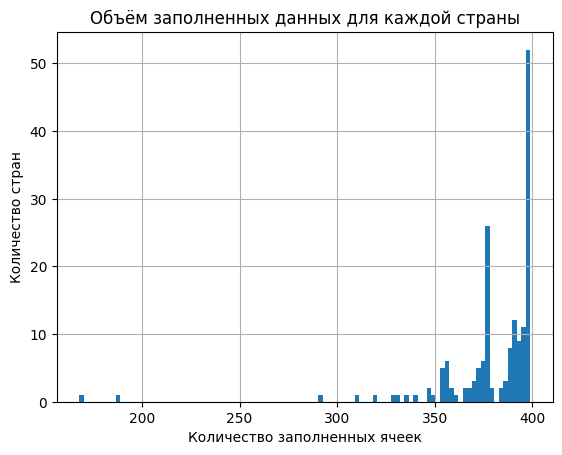

In [30]:
# Группировка данных по странам и подсчёт для них заполненных ячеек в каждом столбце
low_data = df_clear.groupby('country').count()
# Рассчёт суммы заполненных ячеек для каждой страны
low_data['sum'] = low_data.sum(axis=1)
# Визуализация результата с помощью гистограммы
low_data['sum'].hist(bins=100);
plt.title('Объём заполненных данных для каждой страны');
plt.xlabel('Количество заполненных ячеек');
plt.ylabel('Количество стран');

**Замечание:**  Полных данных у нас нет ни по одной из стран.
На графике видно, что у нас есть страны с небольшим количеством заполненных ячеек: `< 200` (меньше половины). Рассмотрим их подробнее.

In [31]:
# Вывод данных для стран с низкой заполненностью данных
low_data[low_data['sum'] < 200]

,year,region,subregion,life_expect,alco,bmi,mort_ad_male,mort_5_14,mort_under_5,mort_infant,diphtheria,hepatitis_b,measles,polio,population,gdp,health_expend,edu_dur,hiv,road_deaths,sum
country,,,,,,,,,,,,,,,,,,,,,
British Virgin Islands,21,0,0,21,0,0,21,21,21,21,0,0,0,0,21,0,0,21,0,0,168
Turks and Caicos Islands,21,0,0,21,0,0,21,21,21,21,0,0,0,0,21,20,0,21,0,0,188


**Замечание:** Получилось 2 страны с заполненностью данных `< 200` (менее 50 %). 0 в таблице означает, что данных по этому признаку нет совсем. Данных явно недостаточно, поэтому удалим объекты с этими странами.

In [32]:
# Удаление строк с данными для конкретных стран
df_clear = df_clear[(df_clear['country'] != 'British Virgin Islands') &
                    (df_clear['country'] != 'Turks and Caicos Islands')]
print('Количество стран в таблице:', len(df_clear['country'].unique()))
print('Количество строк в таблице:', len(df_clear))

Количество стран в таблице: 167
Количество строк в таблице: 3507


#### Заполним пропуски методом интерполяции.
В данных присутствуют пропуски для стран в конкретные годы. Данные упорядочены по годам.   
Например данные признака `alco` есть только за 2000, 2005, 2010, 2015 и 2019 годы. Данные за промежуточные годы отсутствуют. 
Предположим, что изменение значений признака проходило равномерно. Тогда можно заполнить пропущенные данные методом **линейной интерполяции** (интервал между пропущенными значениями одинаковый).


In [33]:
# Копирование таблицы
df_fill = df_clear.copy()
# Заполнение пропущенных значений для каждой страны методом интерполяции
for country in df_clear['country'].unique():
    df_fill[df_fill['country'] == country] = df_clear[df_clear['country'] == country].interpolate(method='linear',
                                                                                                  limit_direction='both',
                                                                                                  axis=0)
# Рассчёт количества пропущенных значений
df_fill.isna().sum()

country             0
year                0
region            210
subregion         212
life_expect         0
alco               42
bmi                42
mort_ad_male        0
mort_5_14           0
mort_under_5        0
mort_infant         0
diphtheria          0
hepatitis_b       105
measles             0
polio               0
population          0
gdp                 0
health_expend      21
edu_dur           231
hiv              1008
road_deaths        42
dtype: int64

#### Заполним пропуски в признаках `region` и `subregion`.
Данную информацию придётся искать в интернете "вручную" для каждой страны.

In [34]:
# Вывод стран в которых пропущенны значения в рассматриваемых признаках
pd.Series(df_fill[df_fill['region'].isna()]['country'].unique())

0        Brunei Darussalam
1               Cabo Verde
2                  Czechia
3                 Eswatini
4       Iran, Islamic Rep.
5              Korea, Rep.
6               Montenegro
7                  Myanmar
8    Sao Tome and Principe
9              Timor-Leste
dtype: object

In [35]:
# Заполнение пропущенных данных
df_fill.loc[df_fill['country'] == 'Brunei Darussalam', ['region', 'subregion']] = 'Asia', 'South-Eastern Asia'
df_fill.loc[df_fill['country'] == 'Cabo Verde', ['region', 'subregion']] = 'Africa', 'Western Africa'
df_fill.loc[df_fill['country'] == 'Czechia', ['region', 'subregion']] = 'Europe', 'Eastern Europe'
df_fill.loc[df_fill['country'] == 'Eswatini', ['region', 'subregion']] = 'Africa', 'Southern Africa'
df_fill.loc[df_fill['country'] == 'Iran, Islamic Rep.', ['region', 'subregion']] = 'Asia', 'Southern Asia'
df_fill.loc[df_fill['country'] == 'Korea, Rep.', ['region', 'subregion']] = 'Asia', 'Eastern Asia'
df_fill.loc[df_fill['country'] == 'Montenegro', ['region', 'subregion']] = 'Europe', 'Southern Europe'
df_fill.loc[df_fill['country'] == 'Myanmar', ['region', 'subregion']] = 'Asia', 'South-Eastern Asia'
df_fill.loc[df_fill['country'] == 'Sao Tome and Principe', ['region', 'subregion']] = 'Africa', 'Middle Africa'
df_fill.loc[df_fill['country'] == 'Timor-Leste', ['region', 'subregion']] = 'Asia', 'South-Eastern Asia'
# Рассчёт количества пропущенных значений
df_fill.isna().sum()

country             0
year                0
region              0
subregion           2
life_expect         0
alco               42
bmi                42
mort_ad_male        0
mort_5_14           0
mort_under_5        0
mort_infant         0
diphtheria          0
hepatitis_b       105
measles             0
polio               0
population          0
gdp                 0
health_expend      21
edu_dur           231
hiv              1008
road_deaths        42
dtype: int64

#### Заполним оставшиеся пропуски средними значениями по группам.
Нам осталось заполнить данные для тех стран по которым нет показателей ни для одного года (всего рассматривается 21 год).
Заполним их средними значениями показателей для субрегиона к которому относится страна. Средние значения будем рассчитывать для каждого отдельно года.

In [36]:
# Список признаков для заполнения
columns_to_fill = ['alco',
                   'bmi',
                   'hepatitis_b',
                   'health_expend',
                   'edu_dur',
                   'hiv',
                   'road_deaths']
# Замена пропущенных значений средним внутри группы для указанных столбцов
for column in columns_to_fill:
    # Группировка данных по субрегиону и году
    bins = df_fill.groupby(['subregion', 'year'])
    # Применение к объекту группировки lambda-функции через метод .apply() 
    # Для каждого объекта с пропущенными данными заполнить средним значением внутри группы
    df_fill[column] = bins[column].apply(lambda x: x.fillna(x.mean()))
# Рассчёт количества пропущенных значений
df_fill.isna().sum()

country            0
year               0
region             0
subregion          2
life_expect        0
alco               2
bmi                2
mort_ad_male       0
mort_5_14          0
mort_under_5       0
mort_infant        0
diphtheria         0
hepatitis_b        2
measles            0
polio              0
population         0
gdp                0
health_expend      2
edu_dur           86
hiv              128
road_deaths        2
dtype: int64

**Замечание:** У нас всё еще остались пропуски. Страны с пропущенными данными не относятся ни к одному из субрегионов по которому есть данные. Поэтому заполним эти ячейки средними значениями по регионам к которым относятся эти страны.

In [37]:
# Список признаков для заполнения
columns_to_fill = ['edu_dur',
                   'hiv']
# Замена пропущенных значений средним внутри группы для указанных столбцов
for column in columns_to_fill:
    # Группировка данных по региону и году
    bins = df_fill.groupby(['region', 'year'])
    # Применение к объекту группировки lambda-функции через метод .apply() 
    # Для каждого объекта с пропущенными данными заполнить средним значением внутри группы
    df_fill[column] = bins[column].apply(lambda x: x.fillna(x.mean()))
# Рассчёт количества пропущенных значений
df_fill.isna().sum()

country          0
year             0
region           0
subregion        2
life_expect      0
alco             2
bmi              2
mort_ad_male     0
mort_5_14        0
mort_under_5     0
mort_infant      0
diphtheria       0
hepatitis_b      2
measles          0
polio            0
population       0
gdp              0
health_expend    2
edu_dur          0
hiv              0
road_deaths      2
dtype: int64

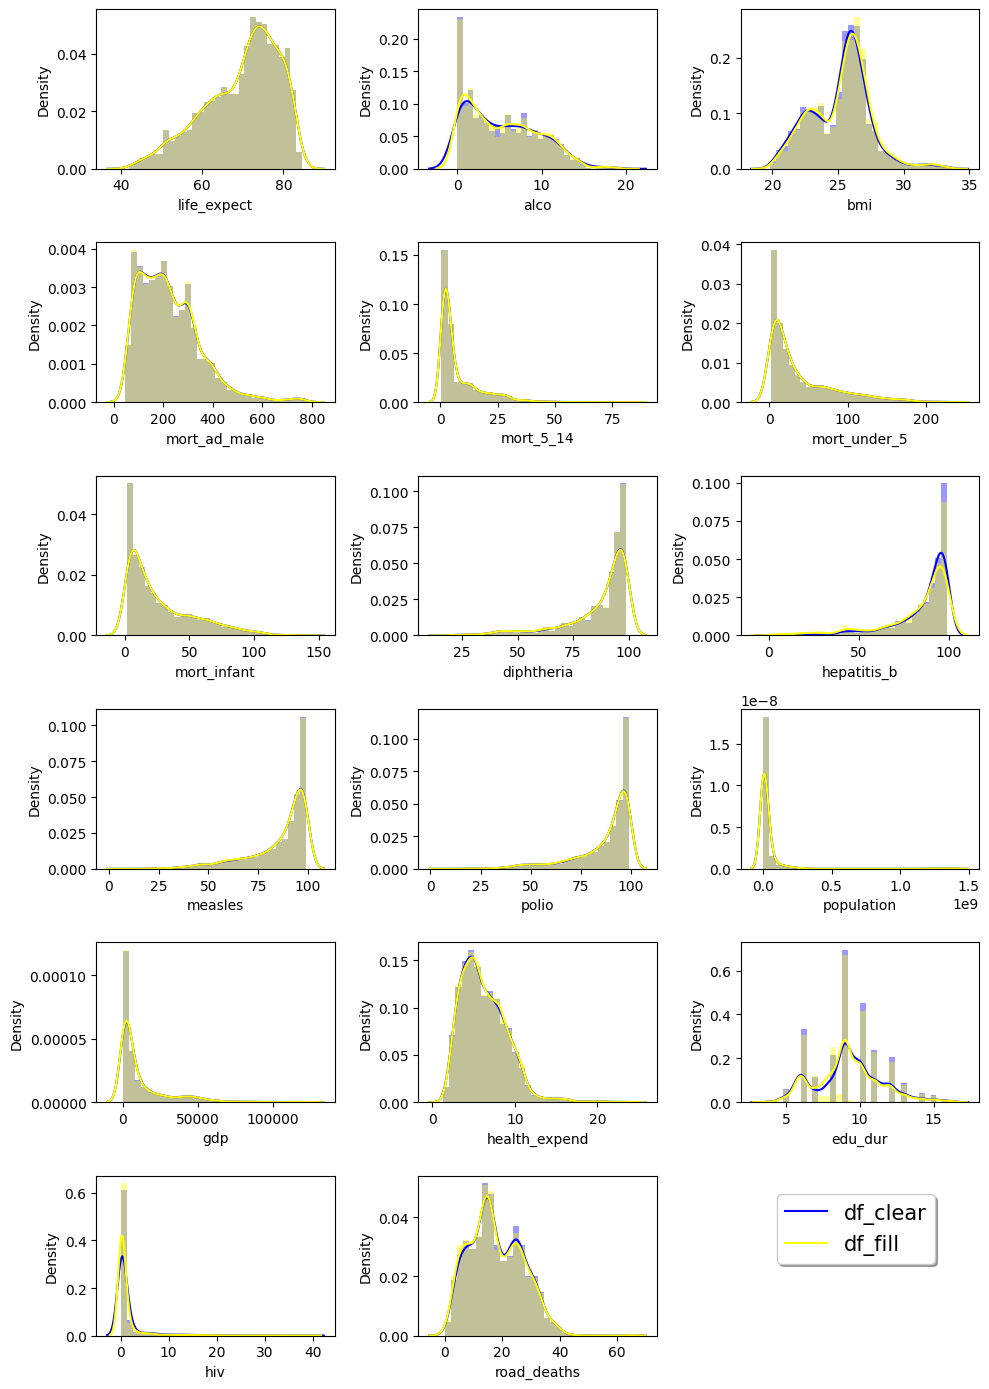

In [38]:
# Построение гистограмм распределения признаков до и после заполнения
fig = plt.figure(figsize=(10, 14));
count = 1 
for column in df_clear.columns[4:]:
    plt.subplot(6, 3, count)
    sns.distplot(df_clear[column], color='blue', label='df_clear', bins=30)
    sns.distplot(df_fill[column], color='yellow', label='df_fill', bins=30)
    count += 1
plt.tight_layout()
fig.legend(labels=['df_clear', 'df_fill'],
           bbox_to_anchor=(0.95, 0.15),
           fontsize=15,
           shadow=True,
           framealpha=1)
plt.show()

**Замечание:** После заполнения пропусков (жёлтый цвет) распределения признаков почти не изменились. Наибольшая разница заметна там, где пропусков было больше, что вполне объяснимо.

### Преобразуем форматы данных.
Данные по численности населения и продолжительности обязательного образования должны быть целочисленными. 

In [39]:
# Перевод данных в формат Int64
df_fill['population'] = df_fill['population'].astype('int64')
df_fill['edu_dur'] = df_fill['edu_dur'].astype('int64')
df_fill.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3507 entries, 0 to 3649
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        3507 non-null   object 
 1   year           3507 non-null   int64  
 2   region         3507 non-null   object 
 3   subregion      3505 non-null   object 
 4   life_expect    3507 non-null   float64
 5   alco           3505 non-null   float64
 6   bmi            3505 non-null   float64
 7   mort_ad_male   3507 non-null   float64
 8   mort_5_14      3507 non-null   float64
 9   mort_under_5   3507 non-null   float64
 10  mort_infant    3507 non-null   float64
 11  diphtheria     3507 non-null   float64
 12  hepatitis_b    3505 non-null   float64
 13  measles        3507 non-null   float64
 14  polio          3507 non-null   float64
 15  population     3507 non-null   int64  
 16  gdp            3507 non-null   float64
 17  health_expend  3505 non-null   float64
 18  edu_dur 

## Поиск зависимостей в данных

### Рассчитаем корреляцию в данных.
С помощью корреляции Пирсона будем искать линейные зависимости.  
А для поиска нелинейных связей будем использовать `phik` корреляцию.  
Для удобства вывода напишем функцию.

In [40]:
# Функция вывода таблицы корреляции в виде тепловой карты
def corr_plot(data, corr_type):
    '''
    data - таблица с данными
    corr_type - тип корреляции ('pirson' или 'phik')
    '''
    if corr_type == 'pirson':
        table = data.corr()
    if corr_type == 'phik':
        table = data.phik_matrix(verbose=False)
    mask = np.triu(table, k=1);
    plt.figure(figsize=(20, 15));
    sns.heatmap(table,
                square=True,
                annot=True,
                linewidth=0.5,
                cmap='coolwarm',
                mask=mask); 

#### Рассчитаем корреляцию Пирсона для признаков.

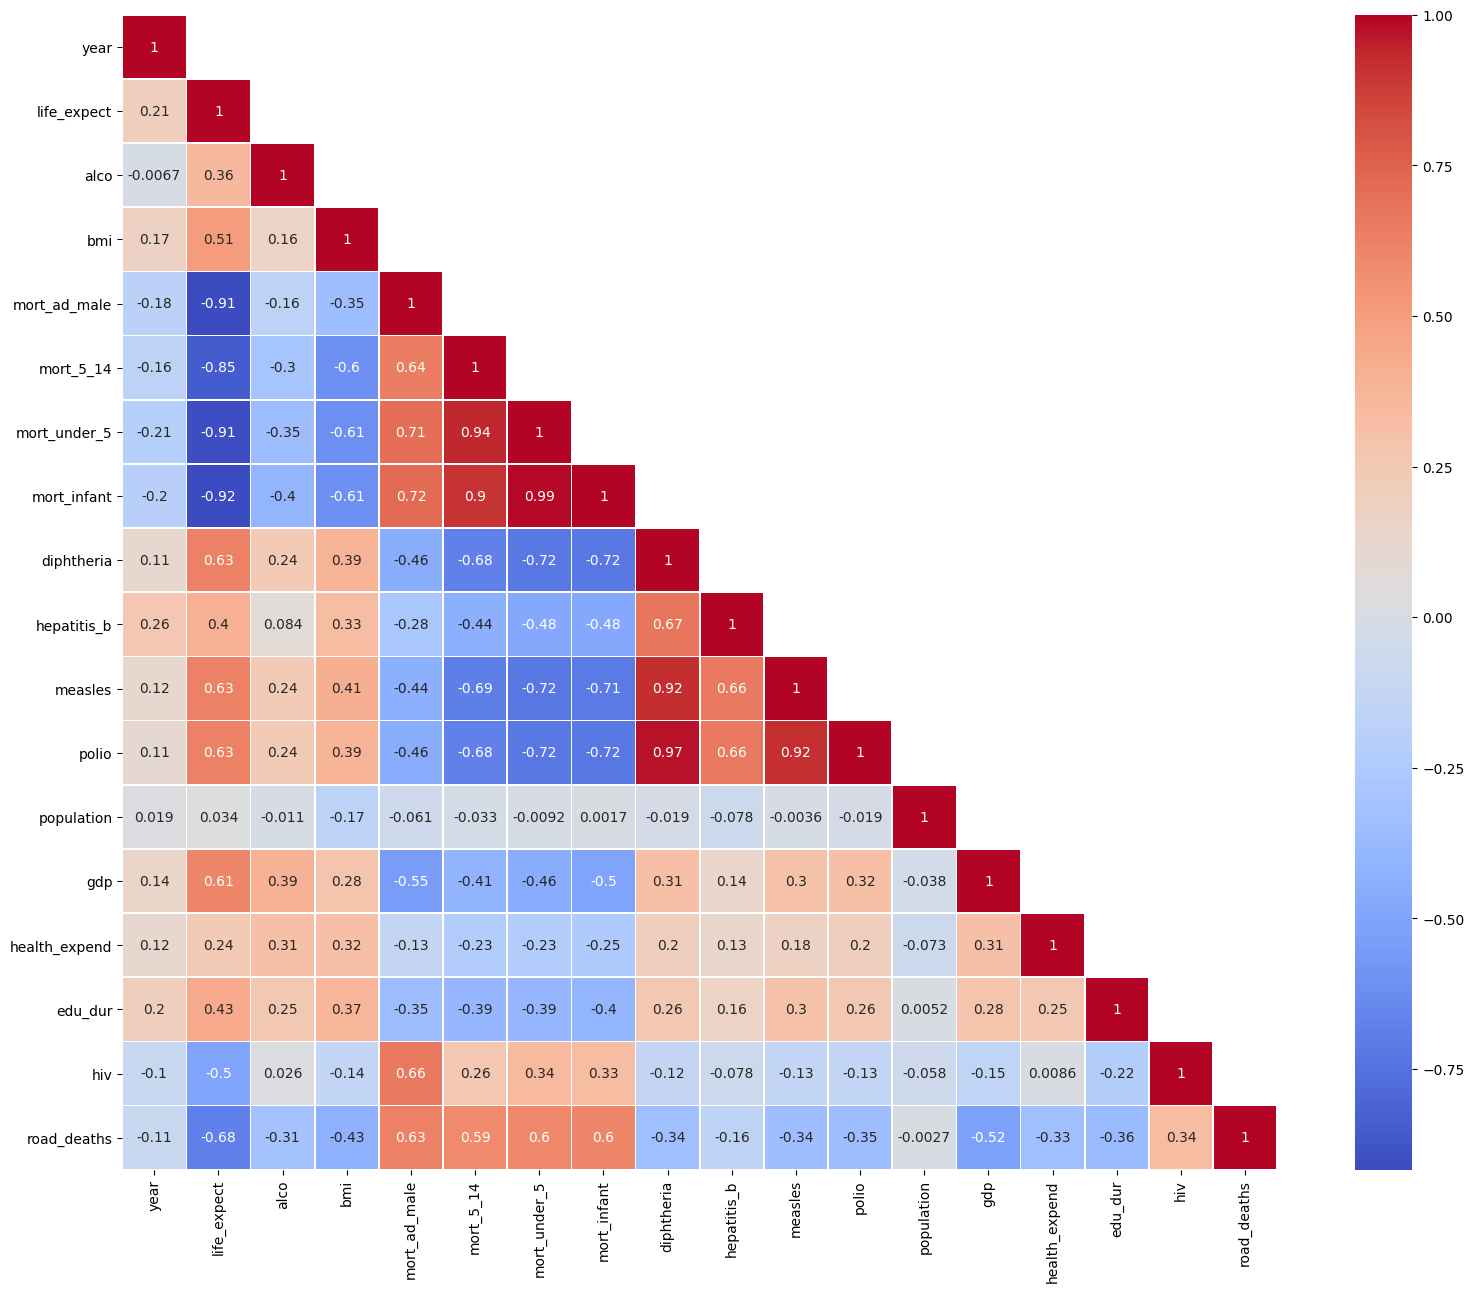

In [41]:
corr_plot(df_fill, 'pirson')

**Замечание:** Целевой признак `life_expect` очень сильно отрицательно коррелирует с признаками коэффициентов смертности `mort_ad_male`, `mort_5_14`, `mort_under_5`, `mort_infant`. Немного слабее корреляция с признаком `road_deaths`. Очевидно, что чем выше уровень смертности, тем будет ниже ожидаемая продолжительность жизни.   
Также наблюдается заметная положительная корреляция целевого признака с признаками охвата иммунизации `diphtheria`, `hepatitis_b`, `'measles`, `polio`. Иммунизация положительно влияет на продолжительность жизни. Примерно также положительно коррелирует признак `gdp` (ВВП на душу населения).   
Заметим также, что эти признаки сильно коррелируют между собой, что логично.

Корреляция Пирсона помогает определить только линейные зависимости. Сильная линейная корреляция может пойти во вред при попытке построить некоторые типы моделей машинного обучения. Возможно, нам придётся один из этих признаков удалить. Всё зависит от того, как будет работать наша модель предсказаний.


#### Рассчитаем Phik корреляцию для признаков.

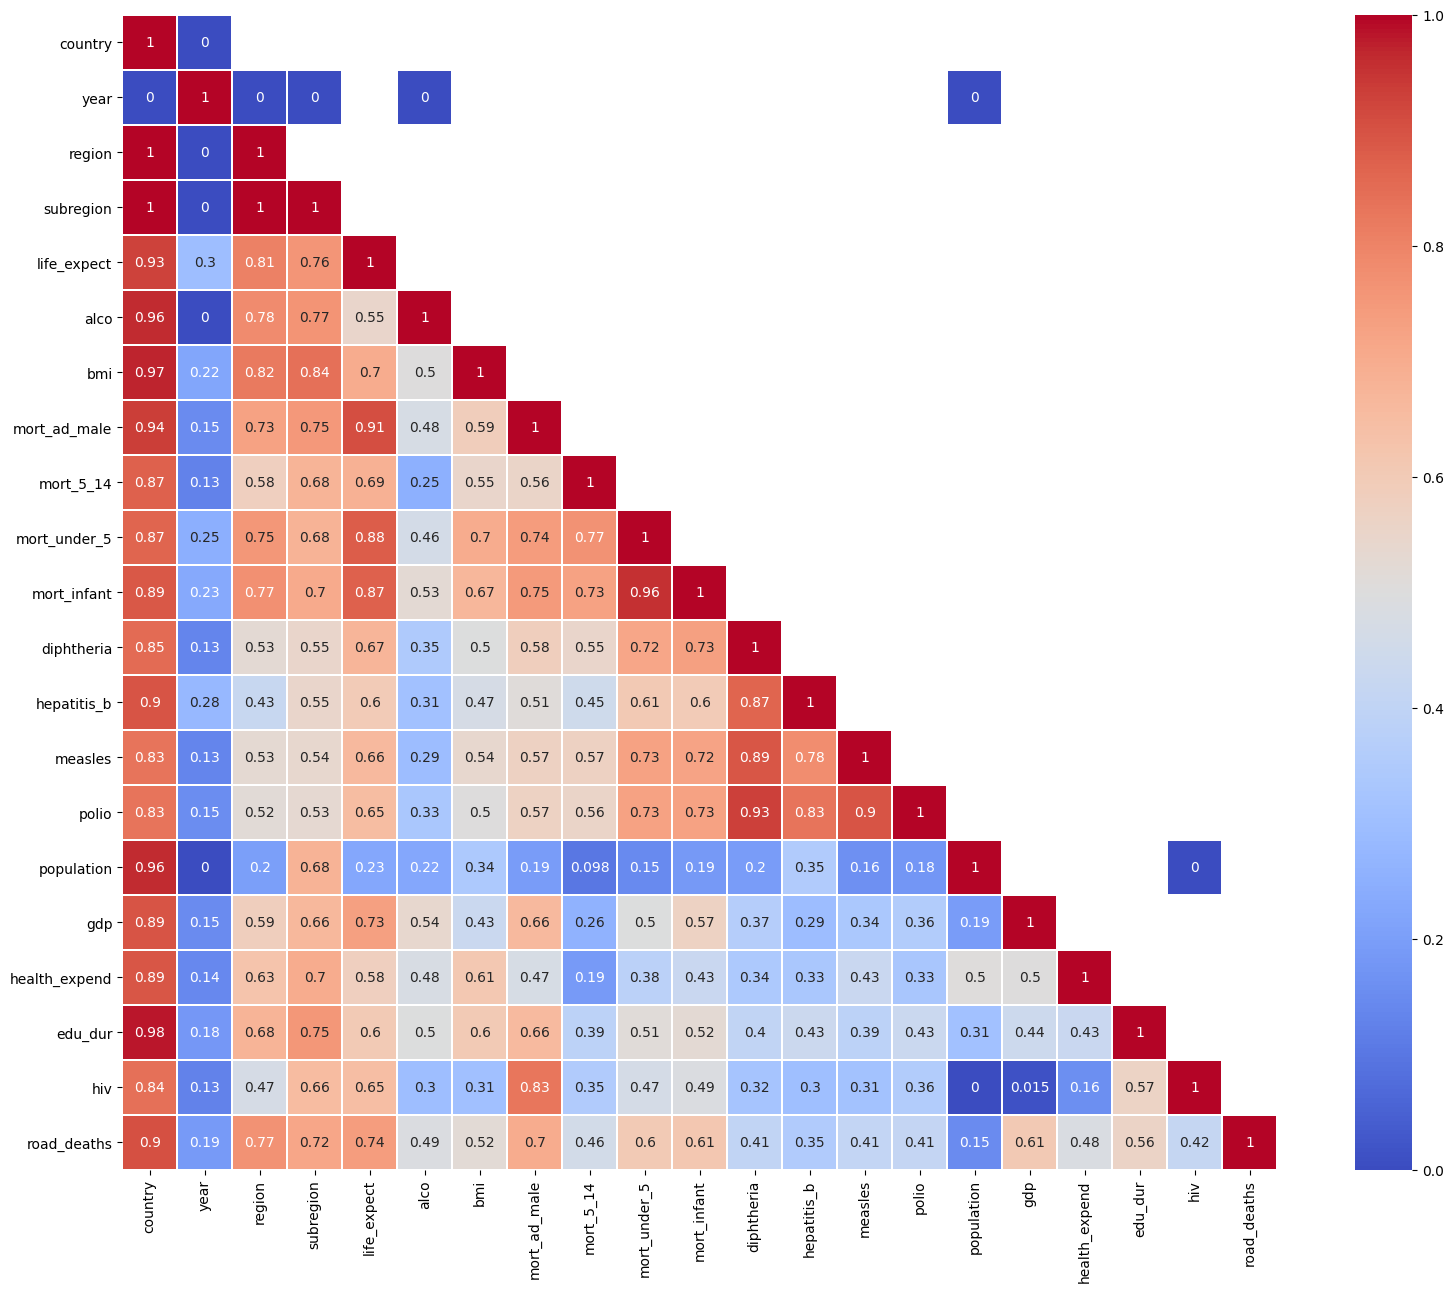

In [42]:
corr_plot(df_fill, 'phik')

**Замечание:** Phik корреляция улавливает нелинейные связи. Здесь большинство коэффициентов выше в сравнении с корреляцией Пирсона (кроме показателей для коэффициентов смертности). Предположим, что в данных доминируют нелинейные связи.   
Признак `country` очень сильно связан со всеми остальными. Все показатели очень сильно зависят от страны к которой они относятся. Предсказания с учётом этого признака не вызывают особого интереса. Мы не будем включать его в обучающую выборку.
Интересно, что самые низкие значения корреляции имеют признаки `year`,`population` и `alco`.

### Изучим распределение  целевого признака.

In [107]:
# Построение интерактивного графика "boxplot" для всех регионов по годам
fig = px.box(df_fill,
             y=['life_expect'],
             animation_frame='year', 
             color='region',
             notched=True)
fig.update_traces(boxmean=True)
fig.update_layout(yaxis_range=[40, 90],
                  title='<b> Распределение ожидаемой продолжительности жизни по регионам',
                  title_x=0.5,
                  xaxis_title='Регионы',
                  yaxis_title='Ожидаемая продолжительность жизни',
                  template='plotly_dark')
fig.show()

[link text](plotly/figure-1.html)

In [52]:
import plotly.io as pio

pio.write_html(fig, file='plotly/figure-1.html', auto_open=False)

In [102]:
from IPython.display import HTML
display(HTML('<a href="plotly/figure-1.html" > Jupiter Noutbook</a>'))

In [105]:
%%html
'<a href="plotly/figure-1.html" > Jupiter Noutbook</a>'

In [81]:
from IPython.display import display, HTML

In [94]:
import os
notebook_path = os.path.abspath("plotly/figure-1.html")


In [111]:
from IPython.display import IFrame
url = 'plotly/figure-1.html'
IFrame(url, width=700, height=500)

In [96]:
display(notebook_path)

'd:\\Data_science\\GIT\\Portfolio\\16_kaggle_ml_life_expectancy\\plotly\\figure-1.html'

**Замечание:** На графике видно как распределяются значения ожидаемой продолжительности жизни населения по регионам. Ползунком внизу графика можно менять год к которому относится значение.   
В большинстве африканских стран самая низкая ожидаемая продолжительность жизни.

In [109]:
# Построение интерактивного линейного графика значений продолжительности жизни для всех стран по годам 
fig = px.line(df_fill,
              x='year',
              y='life_expect',
              animation_frame='country',
              color='country',              
              markers=True,
              template='plotly_dark',
              title='<b> Ожидаемая продолжительность жизни по странам',
              range_x=[1999, 2022],
              range_y=[40, 90])
fig.update_layout(title_x=0.5,
                  xaxis_title='Годы',
                  yaxis_title='Ожидаемая продолжительность жизни',
                  template='plotly_dark',
                  showlegend=False)
fig.show()

**Замечание:** На графике изображены значения ожидаемой продолжительности жизни населения по странам. Ползунком внизу графика можно менять страну к которой относятся значения.  
С годами ожидаемая продолжительность жизни растёт для всех стран, но по разному.

### Изучим зависимости целевого признака от числовых признаков.
Для этого построим диаграммы рассеяния с линиями регрессии.

In [ ]:
# Построение диаграмм рассеяния целевого признака с остальными
fig = plt.figure(figsize=(10, 14));
count = 1 
for column in df_clear.columns[4:]:
    plt.subplot(6, 3, count)
    sns.regplot(data=df_fill, 
                x=column,
                y='life_expect',
                color='green',
                marker='o',
                scatter_kws={'s': 1})
    count += 1
plt.tight_layout()    
plt.show()

**Замечание:** На графиках наглядно изображены зависимости между признаками. Линия регресси показывает направление изменения признаков. 
Довольно странно выглядит зависимость продолжительности жизни с уровнем потребления алкоголя. Изучим её подробнее.

In [ ]:
# Построение диаграмм рассеяния alco-life_expect для разных регионов
fig = plt.figure(figsize=(10, 5));
count = 1 
for region in df_clear['region'].unique():
    plt.subplot(2, 3, count)
    sns.regplot(data=df_fill[df_fill['region'] == region], 
                x='alco',
                y='life_expect',
                color='purple',
                marker='o',
                scatter_kws={'s': 1}).set_title(region)
    count += 1
plt.tight_layout()    
plt.show()

**Замечание:** Потребление алкоголя и ожидаемая продолжительность жизни имеют положительную взаимосвязь в Азии, Америке и Океании, что вводит в заблуждение с точки зрения интуиции.  
Конечно, на линию регрессии особого внимания обращать не нужно. Связь с продолжительностью жизни не сильная и явно нелинейная.

## Обучение моделей
Перед обучением моделей подготовим данные.   
В проекте нам интересно предсказывать целевой показатель без сильной географической привязки и знания в какой год проходили наблюдения (рассчёты).
Поэтому из обучающей выборки удалим годы, данные о названиях стран и субрегионов. Информацию о принадлежности к региону оставим, как довольно грубую географическую информацию.  

### Разобьем данные на выборки.
Выделим из таблицы тестовую выборку (10 % строк). На тестовой (отложенной) выборке мы будем проверять качество нашей итоговой (лучшей среди исследуемых, с подобранными гиперпараметрами) модели, как будто бы на новых (полученных после нашего исследования, например в 2021 году) данных.

In [ ]:
# Создадим переменные для признаков и для целевого признака
df_target = df_fill['life_expect']
df_features = df_fill.drop(['subregion', 'year', 'country', 'life_expect'], axis=1)
# Разобьем наши данные на 2 выборки: тренировочную и тестовую в соотношении 90:10
features_train, features_test, target_train, target_test = train_test_split(df_features,
                                                                            df_target,
                                                                            test_size=0.1,
                                                                            random_state=RANDOM_STATE)
print(features_train.shape)
print(features_test.shape)
print(target_train.shape)
print(target_test.shape)

**Замечание:** В результате мы разбили наши данные на 2 выборки: тренировочную и тестовую, в соотношении 90:10. Для каждой выборки мы создали переменные для признаков и целевого признака. 

### Выполним кодирование  и масштабирование признаков.

Для категориальных признаков выполним приямое кодирование (OHE).   
Для кодирования будем использовать `OneHotEncoder` из `sklearn`. 
Для того чтобы не угодить в дамми-ловушку и не создать проблеммы мультиколлинеарности удалим для каждого признака по одному (первому) столбцу из полученных новых (параметр `drop='first'`).   
Если в тестовых данных появится новое категориальное значение, то кодировщик не создаст дополнительного признака. Если ситуация получится обратная, то в тестовой выборке во всех значениях такого признака будут стоять нули.

Для числовых признаков выполним масштабирование.
Для работы линейных моделей масштабирование может сыграть положительную роль.  
Для "деревянных" моделей масштабирование можно не проводить.  
Для масштабирования будем спользовать `StandardScaler` из `sklearn`. 

Преобразования будем выполнять используя `Pipeline` и `ColumnTransformer`. С их помощью мы решим проблему утечки данных при проведении кросс - валидации. На каждой итерации (обучение - предсказание) мы будем прогонять всю предобработку (кодирование и масштабирование признаков).
После предобработки добавим в итоговый пайплайн модель машинного обучения. Для удобства работы напишем функцию.

In [ ]:
# Сохраниние названий категориальных и численных признаков в списки
cat_cols = [x for x in df_features.columns if df_features[x].dtype == 'object']
num_cols = [x for x in df_features.columns if df_features[x].dtype != 'object']

In [ ]:
# Функция построения итогового "пайплайна" с моделью
def final_pipeline(model):
    '''
    model - модель машинного обучения
    '''
    # Построение "пайплайна" для масштабирования числовых признаков
    num_pipeline = Pipeline(steps=[('scale', StandardScaler())])
    # Построение "пайплайна" для кодирования категориальных признаков
    cat_pipeline = Pipeline(steps=[('one-hot', OneHotEncoder(drop='first',
                                                             sparse=False,
                                                             handle_unknown='ignore'))])
    # Объединение "пайплайнов" в один с помощью "трансформера"
    col_trans = ColumnTransformer(transformers=[('num_pipeline', num_pipeline, num_cols),
                                                ('cat_pipeline', cat_pipeline, cat_cols)],
                                  remainder='drop',
                                  n_jobs=-1)
    # Построение итогового "пайплайна" (добавление модели машинного обучения)
    pipeline = Pipeline(steps=[('col_trans', col_trans),
                               ('model', model)])
    return pipeline

### Обучим модели на тренировочной выборке.
Подбирать гиперпараметры моделей будем с помощью модуля `optuna`. Проверять качество их работы будем методом кросс - валидации. Для анализа моделей будем строить кривые обучения. Для упрощения написания кода создадим функции.

Обучение начнём с простых линейных моделей. Их легче обучить и интерпретировать.
Далее будем двигаться к более сложным моделям.

In [ ]:
# Функция проверки качества модели с помощью кросс-валидации
def mae_pipe_cross(model, features, target, cv):
    '''
    model - модель машинного обучения
    features - таблица признаков
    target - значения целевой переменной
    cv - количество фолдов в методе кросс-валидации
    '''
    # Создание итогового "пайплайна" с помощью функции final_pipeline()
    pipeline = final_pipeline(model)
    # Проверка качества работы модели 
    mae = abs(cross_val_score(pipeline,
                              features,
                              target,
                              cv=cv,
                              scoring='neg_mean_absolute_error')).mean()
    return mae

In [ ]:
# Функция построения графика кривой обучения
def plot_learning_curves(model, features, target, cv):
    '''
    model - модель машинного обучения
    features - таблица признаков
    target - значения целевой переменной
    cv - количество фолдов в методе кросс-валидации
    ''' 
    # Создание итогового "пайплайна" с помощью функции final_pipeline()
    pipeline = final_pipeline(model)
    # Рассчёт параметров для построения кривой обучения
    train_sizes, train_scores, test_scores = learning_curve(estimator=pipeline,
                                                            X=features,
                                                            y=target,
                                                            train_sizes=np.linspace(0.1, 1.0, 5),
                                                            cv=cv,
                                                            scoring='neg_mean_absolute_error',
                                                            random_state=RANDOM_STATE)
    # Рассчёт среднего значения метрик для фолдов кросс-валидации                                                           
    train_mean = abs(np.mean(train_scores, axis=1))
    test_mean = abs(np.mean(test_scores, axis=1))
    # Создание таблицы с рассчитанными  значениями
    data = pd.DataFrame({'train_sizes': train_sizes, 'train_mae': train_mean, 'test_mae': test_mean})
    # Построение интерактивного графика
    fig = px.line(data, x='train_sizes', y=['train_mae', 'test_mae'])  
    fig.update_layout(title='<b> Кривые обучения модели',
                      title_x=0.45,
                      xaxis_title='Размер выборки',
                      yaxis_title='MAE',
                      legend_title='Кривые обучения')
    fig.show()

#### Обучим линейные модели.
Выбирать лучшую модель будем среди: `LinearRegression` ,`Lasso`, `Ridge` и `ElasticNet`.

In [ ]:
# Функция для обучения и предсказания модели с перебором гиперпараметров
def objective_1(trial):
    # Создание переменных для перебора моделей с гиперпараметрами
    regressor_name = trial.suggest_categorical('regressor', ['Lasso',
                                                             'Ridge',
                                                             'ElasticNet',
                                                             'LinearRegression'])
    if regressor_name == 'Lasso':
        param = trial.suggest_float('alpha', 0.01, 10)
        regressor_obj = Lasso(random_state=RANDOM_STATE)
    if regressor_name == 'Ridge':
        param = trial.suggest_float('alpha', 0.1, 10)
        regressor_obj = Ridge(random_state=RANDOM_STATE)    
    if regressor_name == 'ElasticNet':
        param = trial.suggest_float('alpha', 0.01, 10)
        regressor_obj = ElasticNet(random_state=RANDOM_STATE) 
    if regressor_name == 'LinearRegression':
        regressor_obj = LinearRegression()
    # Создание итогового "пайплайна" с моделью
    pipeline = final_pipeline(regressor_obj)
    # Проверка качества модели с помощью кросс-валидации                                 
    mae = abs(cross_val_score(pipeline,
                              features_train,
                              target_train,
                              cv=5,
                              scoring='neg_mean_absolute_error')).mean()
    return mae

# Обучение модели с перебором гиперпараметров с помощью модуля optuna
study = optuna.create_study(direction='minimize')
study.optimize(objective_1, n_trials=10)
# Гиперпараметры лучшей модели
study.best_params

**Замечание:** С помощью `optuna` мы получили лучшую модель `Ridge` с гиперпараметрами: `alpha=1.2932809716263836`.

In [ ]:
# Инициализация модели машинного обучения с подобранными гиперпараметрами
optimal_model_1 = Ridge(alpha=1.2932809716263836)
# Проверка качества модели с помощью кросс-валидации
mae_1 = mae_pipe_cross(optimal_model_1, features_train, target_train, cv=5)
print('MAE модели:', mae_1)

In [ ]:
# Построение и вывод графика кривых обучения модели
plot_learning_curves(optimal_model_1, features_train, target_train, cv=5)

#### Обучим модель `RandomForestRegressor`.

In [ ]:
# Функция для обучения и предсказания модели с перебором гиперпараметров
def objective_2(trial):
    # Создание переменных для перебора гиперпараметров
    n_estimators =  trial.suggest_int('n_estimators', 5, 1000)
    criterion = trial.suggest_categorical('criterion', ['squared_error',
                                                        'friedman_mse',
                                                        'poisson'])
    max_depth = trial.suggest_int('max_depth', 1, 10)
    # Создание модели машинного обучения
    model = RandomForestRegressor(n_estimators=n_estimators,
                                  criterion=criterion,
                                  max_depth=max_depth,
                                  random_state=RANDOM_STATE)
    # Создание итогового пайплайна с моделью
    pipeline = final_pipeline(model)
    # Проверка качества модели с помощью кросс-валидации                                 
    mae = abs(cross_val_score(pipeline,
                              features_train,
                              target_train,
                              cv=5,
                              scoring='neg_mean_absolute_error')).mean()
    return mae

# Обучение модели с перебором гиперпараметров с помощью модуля optuna
study = optuna.create_study(direction='minimize')
study.optimize(objective_2, n_trials=10)
# Гиперпараметры лучшей модели
study.best_params

**Замечание:** С помощью `optuna` мы получили гиперпараметры лучшей модели: `n_estimators=655`, `criterion='poisson'`, `max_depth=10`.

In [ ]:
# Инициализация модели машинного обучения с подобранными гиперпараметрами
optimal_model_2 = RandomForestRegressor(n_estimators=655,
                                        criterion='poisson',
                                        max_depth=10,
                                        random_state=RANDOM_STATE)
# Проверка качества модели с помощью кросс-валидации
mae_2 = mae_pipe_cross(optimal_model_2, features_train, target_train, cv=5)
print('MAE модели:', mae_2)

In [ ]:
# Построение и вывод графика кривых обучения модели
plot_learning_curves(optimal_model_2, features_train, target_train, cv=5)

#### Обучим модель `GradientBoostingRegressor`.

In [ ]:
# Функция для обучения и предсказания модели с перебором гиперпараметров
def objective_3(trial):
    # Создание переменных для перебора гиперпараметров
    loss = trial.suggest_categorical('loss', ['squared_error',
                                              'absolute_error'])
    learning_rate =  trial.suggest_float('learning_rate', 0.01, 1)
    n_estimators =  trial.suggest_int('n_estimators', 5, 1000)
    criterion = trial.suggest_categorical('criterion', ['squared_error',
                                                        'friedman_mse'])
    max_depth = trial.suggest_int('max_depth', 1, 10)
    # Создание модели машинного обучения
    model = GradientBoostingRegressor(loss=loss,
                                      learning_rate=learning_rate,
                                      n_estimators=n_estimators,
                                      criterion=criterion,
                                      max_depth=max_depth,
                                      random_state=RANDOM_STATE)
    # Создание итогового пайплайна с моделью
    pipeline = final_pipeline(model)
    # Проверка качества модели с помощью кросс-валидации                                 
    mae = abs(cross_val_score(pipeline,
                              features_train,
                              target_train,
                              cv=5,
                              scoring='neg_mean_absolute_error')).mean()
    return mae

# Обучение модели с перебором гиперпараметров с помощью модуля optuna
study = optuna.create_study(direction='minimize')
study.optimize(objective_3, n_trials=10)
# Гиперпараметры лучшей модели
study.best_params

**Замечание:** С помощью `optuna` мы получили гиперпараметры лучшей модели: `loss='squared_error'`, `learning_rate=0.1540628427154385`, `n_estimators=701`, `criterion='squared_error'`, `max_depth=4`.

In [ ]:
# Инициализация модели машинного обучения с подобранными гиперпараметрами
optimal_model_3 = GradientBoostingRegressor(loss='squared_error',
                                            learning_rate=0.1540628427154385,
                                            n_estimators=701,
                                            criterion='squared_error',
                                            max_depth=4,
                                            random_state=RANDOM_STATE)
# Проверка качества модели с помощью кросс-валидации
mae_3 = mae_pipe_cross(optimal_model_3, features_train, target_train, cv=5)
print('MAE модели:', mae_3)

In [ ]:
# Построение и вывод графика кривых обучения модели
plot_learning_curves(optimal_model_3, features_train, target_train, cv=5)

#### Обучим модель `LGBMRegressor`.

In [ ]:
# Функция для обучения и предсказания модели с перебором гиперпараметров
def objective_4(trial):
    # Создание переменных для перебора гиперпараметров
    learning_rate =  trial.suggest_float('learning_rate', 0.01, 0.1)
    n_estimators =  trial.suggest_int('n_estimators', 5, 1000)
    max_depth = trial.suggest_int('max_depth', 1, 10)
    # Создание модели машинного обучения
    model = LGBMRegressor(learning_rate=learning_rate,
                          n_estimators=n_estimators,
                          max_depth=max_depth,
                          verbose=-1,
                          random_state=RANDOM_STATE)
    # Создание итогового пайплайна с моделью
    pipeline = final_pipeline(model)
    # Проверка качества модели с помощью кросс-валидации                                 
    mae = abs(cross_val_score(pipeline,
                              features_train,
                              target_train,
                              cv=5,
                              scoring='neg_mean_absolute_error')).mean()
    return mae

# Обучение модели с перебором гиперпараметров с помощью модуля optuna
study = optuna.create_study(direction='minimize')
study.optimize(objective_4, n_trials=10)
# Гиперпараметры лучшей модели
study.best_params

**Замечание:** С помощью `optuna` мы получили гиперпараметры лучшей модели: `learning_rate=0.08920071335938545`, `n_estimators=350`, `max_depth=8`.

In [ ]:
# Инициализация модели машинного обучения с подобранными гиперпараметрами
optimal_model_4 = LGBMRegressor(learning_rate=0.08920071335938545,
                                n_estimators=350,
                                max_depth=8,
                                random_state=RANDOM_STATE,
                                verbose=-1)
# Проверка качества модели с помощью кросс-валидации
mae_4 = mae_pipe_cross(optimal_model_4, features_train, target_train, cv=5)
print('MAE модели:', mae_4)

In [ ]:
# Построение и вывод графика кривых обучения модели
plot_learning_curves(optimal_model_4, features_train, target_train, cv=5)

**Вывод:**   
Судя по графикам кривых обучения, с увеличением размера выборки средняя абсолютная ошибка (MAE) всех моделей на тестовых данных уменьшается. Это говорит нам о том, что рассматриваемые модели имеют потенциал. Если увеличить количество данных для обучения, точность предсказания моделей будет расти.

### Сравним результаты работы моделей.

In [ ]:
comparison = pd.DataFrame([mae_1, mae_2, mae_3, mae_4],
                          index=['LinearRegression',
                                 'RandomForestRegressor',
                                 'GradientBoostingRegressor',
                                 'LGBMRegressor'],
                          columns=['MAE'])
comparison

**Вывод:** 
Модели градиентного бустинга (`GradientBoostingRegressor` и `LGBMRegressor`) традиционно оказались лидерами.    
Лучшее качество показала модель `LGBMRegressor` (MAE=0.326113). Кроме того она работает заметно быстрее своего "аналога" из `sklearn`.
Гиперпараметры модели: `learning_rate=0.08920071335938545`, `n_estimators=350`, `max_depth=8`.

## Анализ лучшей модели

### Проверим качество модели `LGBMRegressor` на тестовой выборке.
Для того, чтобы повысить качество предсказаний обучим нашу итоговую модель сразу на всех тренировочных данных.

In [ ]:
# Инициализация модели машинного обучения с лучшим результатом работы
best_model = optimal_model_4
# Создание итогового пайплайна с моделью
best_pipeline = final_pipeline(best_model)
# Обучим модель на тренировочных данных
best_pipeline.fit(features_train, target_train)
# Получение предсказаний модели на тестовых данных
predict_best_model = best_pipeline.predict(features_test)
# Проверка качества модели
mae_test = mean_absolute_error(target_test, predict_best_model)
print('MAE модели:', mae_test)
print('**********************************')
r2_test = r2_score(target_test, predict_best_model)
print('R2 модели:', r2_test)
rmse_test = mean_squared_error(target_test, predict_best_model)**0.5
print('RMSE модели:', rmse_test)

**Замечание:** Наша модель показала результат, который немного лучше, чем на тренировочной выборке. Это можно, объяснить тем, что мы обучили модель на большем количестве данных (сразу на всей обучающей выборке). Тогда, как на предыдущем этапе мы обучали модель методом кросс - валидации на фолдах. На графике кривых обучения мы видели, что модель имела потенциал, в случае увеличения количества обучающих данных.

Судя по значению коэффициента детерминации `R2=0.99737477849343` точность наших предсказаний довольно высокая.

In [ ]:
# Создание таблицы с истинными и предсказанными значениями целевого признака
comparison_df = pd.DataFrame({'Actual': target_test, 'Predicted': predict_best_model}).reset_index()
# Построение интерактивной диаграммы рассеяния для значений истинных и предсказанных целевого признака
fig = px.scatter(comparison_df,
                 x='Actual',
                 y='Predicted',
                 color='Actual')
fig.update_layout(title='Сравнение истинных и предсказанных значений ожидаемой продолжительности жизни',
                  xaxis_title='Истинные значения',
                  yaxis_title='Предсказанные значения',
                  showlegend=False)
fig.show()

**Замечание:** Наведя курсор на точку графика, можно увидеть истинное и предсказанное значение ожидиемой продолжительности жизни.

In [ ]:
# Рассчёт и добавление в таблицу значений ошибок предсказаний модели
comparison_df['Residuals'] = comparison_df['Actual'] - comparison_df['Predicted']
# Построение графика ошибок
plt.figure(figsize=(8, 4), dpi=200)
plt.scatter(comparison_df['Predicted'], comparison_df['Residuals'], color='blue')
plt.axhline(y=0, color='orange', linestyle='--')
plt.xlabel('Предсказанные значения')
plt.ylabel('Ошибки')
plt.title('График ошибок')
plt.show();

**Замечание:** На графике видно, что наша модель ошибается в большинстве случаев не более чем на один год. Максимальная ошибка модели составляет около двух лет (-2 на графике). Такие "высокие" погрешности происходят очень редко.

### Проверим модель на адекватность предсказаний.

In [ ]:
# Создание константной модели на основе среднего значения
dummy_mean = DummyRegressor(strategy='mean').fit(features_train, target_train)
# Получение предсказаний константной модели на основе среднего значения
predict_dummy_mean = dummy_mean.predict(features_test)
# Рассчёт ключевых метрик для константной модели на основе среднего значения
mae_test_mean = mean_absolute_error(target_test, predict_dummy_mean)
print('MAE "средней" модели:', mae_test_mean)

# Создание константной модели на основе медианы
dummy_median = DummyRegressor(strategy='median').fit(features_train, target_train)
# Получение предсказаний константной модели на основе медианы
predict_dummy_median = dummy_median.predict(features_test)
# Рассчёт ключевых метрик для константной модели на основе медианы
mae_test_median = mean_absolute_error(target_test, predict_dummy_median)
print('MAE "медианной" модели:', mae_test_median)

**Замечание:** Предсказания средним или медианой по всему датасету очень сильно отличаются от истинных значений. На этапе поиска зависимостей мы выяснили, что ожидаемая продолжительность жизни сильно отличается в разных регионах планеты. Поэтому выполним предсказания нашей "наивной" модели средним значением (и медианой) по регионам.

In [ ]:
# Функция предсказания "наивной" модели значениями (например, средними) по регионам планеты
def dummy_region(metric):
    '''
    metric - способ предсказания наивной модели
    '''
    # Пустые списки для предсказаний и истинных значений
    predict_all = []
    target_test_all = []
    # Для каждого объекта региона выполняется предсказание средним значением по региону
    # Полученный список значений по региону добавляется в общий список
    # На каждой итерации в общий список добавляются истинные значения признака также в виде списка
    for region in df_fill.groupby('region')['life_expect'].count().index:
        dummy = DummyRegressor(strategy=metric).fit(features_train[features_train['region'] == region],
                                                    target_train[features_train['region'] == region])
        predict_dummy = dummy.predict(features_test[features_test['region'] == region])
        predict_all.append(predict_dummy)   
        target_test_all.append(target_test[features_test['region'] == region])
    # Распаковка вложенных списков
    predict_all = list(chain.from_iterable(predict_all))
    target_test_all = list(chain.from_iterable(target_test_all))
    # рассчёт метрики качества модели и вывод её на экран
    mae_test = mean_absolute_error(target_test_all, predict_all)
    print(f'MAE "{metric}" модели:', mae_test)

In [ ]:
dummy_region('mean')
dummy_region('median')

**Замечание:**  Результаты нашей работы намного лучше константных предсказаний.
Итоговая модель прошла проверку на адекватность в сравнении с "наивными" моделями.

### Оценим важность признаков для работы модели.
Для данной модели важность признаков будем оценивать методом `shap` (значения Шепли).   

In [ ]:
# Инициализация "explainer" для тестируемой модели "best_pipeline['model']"
explainer = shap.TreeExplainer(best_pipeline['model'])
# Выполнение преобразований признаков с помощью трансформера "best_pipeline['col_trans']"
observations = pd.DataFrame(best_pipeline['col_trans'].transform(features_test),
                            columns=best_pipeline[:-1].get_feature_names_out())
# Переименование столбцов
observations.columns = observations.columns.astype(str).str.split('pipeline__').str[1]
# Получение значений Шепли
test_shap_values = explainer(observations)
# Построение столбчатого графика усреднения значений Шепли
plt.title('Результаты усреднения SHAP‑значений');
shap.plots.bar(test_shap_values, max_display=30)
# Построение графика визуализации всех значений Шепли
plt.title('Визуализация всех SHAP‑значений для каждого признака');
shap.plots.beeswarm(test_shap_values, max_display=30)

**Замечание:**  На первом (столбчатом) графике мы показали усреднённые значения Шепли для каждого признака.
На втором (`beeswarm`) графике видны все значения Шепли в виде точки, также для каждого признака.
Наибольшее влияние на предсказания модели оказывают признаки c смертности: `mort_under_5`, `mort_ad_male`, `mort_5_14`, `mort_infant`. Заметим, что они имеют самую большую линейную и нелинейную корреляцию с целевым признаком.   

С помощью `shap` мы можем начать понимать природу взаимоотношений между признаками и прогнозными решениями модели.  
Например, в случае с признаком `mort_under_5`, видно, что низкое значение смертности соответствует положительному shap‑значению (от 0 до 5). Положительное значение shap "двигает" предсказание модели в сторону увеличения ожидаемой продолжительности жизни.

Также интересно заметить, что признаки `alco`, `gdp`, `population` оказывают довольно сильное влияние на работу модели. Например, они "важнее" чем уровень иммунизации населения. Хотя судя по корреляции всё должно было быть наооборот. 

Кроме того, уровень потребления алкоголя оказывает положительное влияние на ожидаемую продолжительность жизни. Это конечно странно. Скорее всего этот признак связан не напрямую с целевым признаком и сложнее (через другие признаки).

**Также с помощью `shap` мы можем узнать влияние признаков для каждого отдельного предсказания модели.**

**Рассмотрим самый не точный прогноз модели.**

In [ ]:
# Вывод информации по самому не точному предсказанию модели
comparison_df.loc[comparison_df['Residuals'] == comparison_df['Residuals'].min()]

In [ ]:
# Визуализация SHAP-значений для объекта №218
plt.title('SHAP‑значения для объекта');
shap.plots.waterfall(test_shap_values[218], max_display=30)

**Замечание:**  Ответ модели оказался выше истинного показателя. Из графика видно, что низкое значение признаков `mort_under_5`, `mort_5_14`, `mort_infant` привели к завышенному прогнозу модели.   

**Можно посмотреть на информацию по этому объекту до и после заполнения.** 

In [ ]:
# Вывод информации по объекту до заполнения пропущенных данных
df.loc[comparison_df.loc[comparison_df['Residuals'] == comparison_df['Residuals'].min()]['index']]

In [ ]:
# Вывод информации по объекту после заполнения пропущенных данных
df_fill.loc[comparison_df.loc[comparison_df['Residuals'] == comparison_df['Residuals'].min()]['index']]

**Замечание:**  Пропуски были в столбцах `region`, `subregion`, `alco`,	`bmi` и `road_deaths`. Как видно эти признаки не оказали сильного влияния на предсказание модели.

## Общий вывод

В проекте мы исследовали ожидаемую продолжительность жизни в разных странах. Для этого мы изучили данные по смертности и иммунизации, а также социально - экономические факторы.   
После анализа данных мы построили модель машинного обучения которая точно предсказывает целевой показатель на основе имеющейся информации.

**Этапы выполнения проекта:**
    
1. **Изучение данных.**   
   Сначала мы загрузили данные (17 файлов) с двух ресурсов: база данных Всемирного банка и Всемирная организация здравоохранения (ВОЗ). После чего переформатировали данные в таблицы единого вида и объединили их в общую таблицу. Также добавили информацию: регион и субрегион страны, с помощью библиотеки `countryinfo`. 
      
2. **Предобработка данных.**   
   На данном этапе мы удалили строки с пропущенными значениями целевого признака, а также строки с заполненностью менее 50 %. После этого, так где это возможно, пустые места заполнили методом интерполяции. Затем в ручную занесли данные о регионе и субрегионе некоторых стран. И оставшиеся пропуски заполнили средними внутригрупповыми значениями. В завершении этапа преобразовали форматы для части данных.

3. **Поиск зависимостей в данных.**    
   Здесь мы рассчитали линейную и нелинейную корреляцию признаков. Далее подробно изучили целевой признак. И наконец, рассмотрели зависимости ожидаемой продолжительности жизни от всех имеющихся признаков.
    
4. **Обучение моделей.**   
   Перед обучением моделей мы выделили целевой признак и признаки по которым обучали модели, после чего выделили обучающую и  отложенную (тестовую выборку). 
   Обучение и проверку кучества моделей делали с помощью кросс - валидации. При этом на каждой итерации происходило масштабирование числовых и кодирование категориальных признаков с помощью  `Pipeline` и `ColumnTransformer`. Подбор гиперпараметров модели делалис помощью модуля `optuna`.
   В ходе исследования были обучены модели: `LinearRegression`, `Lasso`, `Ridge`, `ElasticNet`, `RandomForestRegressor`, `GradientBoostingRegressor` и `LGBMRegressor`. Для каждого типа моделей были мы построили кривые обучения.
   В итоге лучший результат `(MAE=0.326113)` показала модель: `LGBMRegressor`с гиперпараметрами: `learning_rate=0.08920071335938545`, `n_estimators=350`, `max_depth=8`.
   
5. **Анализ лучшей модели.**   
   На последнем этапе проекта мы проверили итоговую модель на тестовой выборке, получили результаты: `MAE=0.314833461226474`3 и `R2=0.9973747784934`3. Качество предсказаний довольно высокое и даже немного лучше, чем на обучающей выборке. Скорее всего это из-за того, что мы обучали итоговую модель на всей тренировочной выборке сразу (в отличии от кросс - валидации на этапе сравнения всех моделей). На кривых обучения мы видили потенциал модели при увеличении количества данных.
   За этим последовало сравнение итоговой модели с наивной. Таким образом мы проверили модель на адекватность предсказаний.
   И в конце оценили важность признаков в работе нашей "лучшей" модели с помощью модуля `shap`. Оказалось, что наибольшее влияние на её работу оказывают показатели смертности.
 
**Итоговые замечания:**  

* Показатели младенческой и взрослой смертности наиболее сильно влияют на ожидаемую продолжительность жизни.   

* Человек может продлить свою жизнь, придерживаясь здорового образа жизни, получая надлежащее образование и делая прививки.   

* Конечно, местоположение играет важную роль. В ходе нашего анализа мы увидели, что люди, живущие в Европе, имеют более высокую продолжительность жизни по сравнению с другими континентами. А продолжительность жищни в Африке заметно ниже. 

* Доходы страны и их траты влияют на ожидаемую продолжительность жизни не так сильно.  

* Очевидно, что странам необходимо прилагать усилия по снижению уровня заболеваемости вирусом иммунодефицита человека (ВИЧ) и снижению количества дорожно транспортных происшествий (ДТП).  

* Нам не удалось однозначно определить как влияет численность населения, употребление алкоголя на ожидаемую продолжительность жизни людей. Думаем, что влияние это происходит не на прямую, а косвенно через другие показатели.    

* Есть некоторые параметры, такие как загрязнение окружающей среды и экологический индекс, которые отсутствовали в этом анализе и, как ожидается, будут тесно связаны с ожидаемой продолжительностью жизни.  